In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
import requests
from urllib.parse import urlparse
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = './NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf'
import matplotlib.font_manager as fm
fontprop = fm.FontProperties(fname=font_path, size=18)
import seaborn as sns
import shap

In [2]:
%%time
# Read Data
basedir = './Training/training_data_ver_16/'
training_data_df = pd.read_csv(basedir + 'training_data_ver_16.csv').drop(columns=['주택가격지수']).dropna()
#training_data_df = training_data_df[(training_data_df['가격면적'] >= 200) & (training_data_df['가격면적'] <= 1500)]
training_data_df.columns = [col.replace(' ','_').replace('·','_') for col in training_data_df.columns]

Wall time: 1min 25s


In [3]:
training_data_df = training_data_df[(training_data_df['가격면적'] >= 200) & (training_data_df['가격면적'] <= 3000)]

In [4]:
training_data_df['호수대비부속건축물면적'] = training_data_df['부속건축물면적'] / training_data_df['총호수']

In [5]:
training_data_df = training_data_df[(training_data_df['호수대비부속건축물면적'] < 100)]

In [6]:
training_data_df = training_data_df.reset_index(drop=True)

In [7]:
cols_to_log = ['총건축면적', '총연면적', '총용적률연면적', '토지면적', '부속건축물면적']
for col in cols_to_log:
    training_data_df[col] = training_data_df[col].apply(np.log1p)

In [8]:
cat_cols_df = pd.read_csv(basedir + 'cat_cols.csv')

In [9]:
cat_cols_list = [col.replace(' ','_').replace('·','_') for col in cat_cols_df['colname'].tolist()]
len(cat_cols_list)

296

In [10]:
cat_cols = [col for col in training_data_df.columns if col in cat_cols_list]
len(cat_cols)

296

In [11]:
cat_cols[:10]

['건물나이',
 'trade_type',
 '표준지여부',
 '지목명',
 '용도지역명1',
 '용도지역명2',
 '토지이동상황',
 '지형높이',
 '지형형상',
 '도로접면']

In [12]:
vif_result_df = pd.read_csv('./Production_Prep/vif5.csv')
print(vif_result_df.shape)
vif_result_df.head()

(16, 1)


,cols_to_drop
0,총건축면적
1,호수대비연면적
2,토지면적
3,광로2류(폭_50M~70M)
4,상대보호구역


In [13]:
vif_cols_to_drop = vif_result_df['cols_to_drop'].tolist()
vif_cols_to_drop

['총건축면적',
 '호수대비연면적',
 '토지면적',
 '광로2류(폭_50M~70M)',
 '상대보호구역',
 '지구단위계획구역',
 '전용면적_max',
 '총연면적',
 '전용면적_mean',
 '총용적률연면적',
 '층max',
 '상대정화구역',
 '층median',
 '주_용도_공동주택_fraction',
 '전용면적_min',
 '철근콘크리트구조_fraction']

# Training

In [14]:
from sklearn.model_selection import KFold, GroupKFold

In [15]:
import lightgbm as lgb

In [16]:
from sklearn.metrics import r2_score

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [18]:
target_cols = ['금액(만원)', '가격면적', 'target_log_transformed', 'targetarea_log_transformed', '지번주소']

In [19]:
cols_to_drop = target_cols + vif_cols_to_drop

In [20]:
cat_cols = [col for col in cat_cols if col not in cols_to_drop]
len(cat_cols)

292

In [21]:
# Next things to do:
# 1. Do Variance Inflation Factor (VIF) analysis.
# 2. keep the feature with the highest shap value
# 3. Retrain
# 4. Remove 1 feature at a time and find out the set of feature with the lowest loss.
# 5. Retrain
# 6. Continue production prep

Fold 0 start
y dist plot


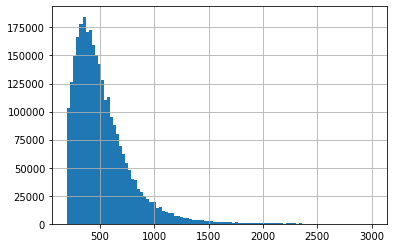

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.922717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7768
[LightGBM] [Info] Number of data points in the train set: 2926580, number of used features: 362


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 524.640869
Training until validation scores don't improve for 500 rounds
[50]	valid_0's huber: 79.4364
[100]	valid_0's huber: 64.8148
[150]	valid_0's huber: 58.7747
[200]	valid_0's huber: 55.029
[250]	valid_0's huber: 52.649
[300]	valid_0's huber: 51.0158
[350]	valid_0's huber: 49.6224
[400]	valid_0's huber: 48.4377
[450]	valid_0's huber: 47.498
[500]	valid_0's huber: 46.7028
[550]	valid_0's huber: 46.0208
[600]	valid_0's huber: 45.3746
[650]	valid_0's huber: 44.7939
[700]	valid_0's huber: 44.2959
[750]	valid_0's huber: 43.81
[800]	valid_0's huber: 43.3478
[850]	valid_0's huber: 42.9686
[900]	valid_0's huber: 42.6416
[950]	valid_0's huber: 42.2936
[1000]	valid_0's huber: 42.0025
[1050]	valid_0's huber: 41.7419
[1100]	valid_0's huber: 41.4528
[1150]	valid_0's huber: 41.174
[1200]	valid_0's huber: 40.9608
[1250]	valid_0's huber: 40.7258
[1300]	valid_0's huber: 40.4835
[1350]	valid_0's huber: 40.2921
[1400]	valid_0's huber: 40.0964
[1450]	valid_

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


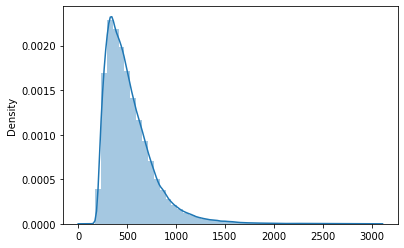

Fold 0 end
Fold 1 start
y dist plot


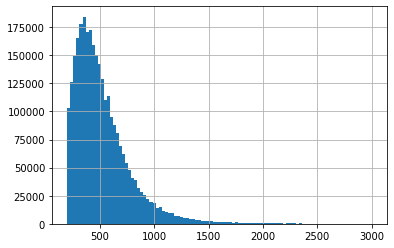

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.023074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7771
[LightGBM] [Info] Number of data points in the train set: 2926581, number of used features: 364


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 524.755320
Training until validation scores don't improve for 500 rounds
[50]	valid_0's huber: 79.6606
[100]	valid_0's huber: 64.94
[150]	valid_0's huber: 58.9011
[200]	valid_0's huber: 55.2151
[250]	valid_0's huber: 52.7723
[300]	valid_0's huber: 51.0014
[350]	valid_0's huber: 49.6042
[400]	valid_0's huber: 48.3767
[450]	valid_0's huber: 47.4292
[500]	valid_0's huber: 46.7371
[550]	valid_0's huber: 45.9836
[600]	valid_0's huber: 45.3531
[650]	valid_0's huber: 44.7882
[700]	valid_0's huber: 44.2907
[750]	valid_0's huber: 43.866
[800]	valid_0's huber: 43.3669
[850]	valid_0's huber: 42.9909
[900]	valid_0's huber: 42.6606
[950]	valid_0's huber: 42.3184
[1000]	valid_0's huber: 42.0602
[1050]	valid_0's huber: 41.7767
[1100]	valid_0's huber: 41.5414
[1150]	valid_0's huber: 41.2862
[1200]	valid_0's huber: 40.9869
[1250]	valid_0's huber: 40.7193
[1300]	valid_0's huber: 40.514
[1350]	valid_0's huber: 40.3241
[1400]	valid_0's huber: 40.1406
[1450]	vali

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


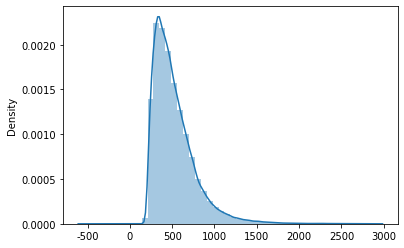

Fold 1 end
Fold 2 start
y dist plot


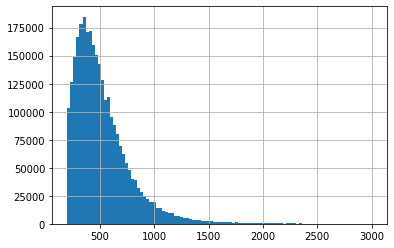

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.093610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7781
[LightGBM] [Info] Number of data points in the train set: 2926581, number of used features: 365


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 524.648130
Training until validation scores don't improve for 500 rounds
[50]	valid_0's huber: 79.5243
[100]	valid_0's huber: 64.6452
[150]	valid_0's huber: 58.5621
[200]	valid_0's huber: 54.8136
[250]	valid_0's huber: 52.4484
[300]	valid_0's huber: 50.586
[350]	valid_0's huber: 49.268
[400]	valid_0's huber: 48.0682
[450]	valid_0's huber: 47.1858
[500]	valid_0's huber: 46.3912
[550]	valid_0's huber: 45.8323
[600]	valid_0's huber: 45.2319
[650]	valid_0's huber: 44.6594
[700]	valid_0's huber: 44.1157
[750]	valid_0's huber: 43.624
[800]	valid_0's huber: 43.2065
[850]	valid_0's huber: 42.8205
[900]	valid_0's huber: 42.4653
[950]	valid_0's huber: 42.1428
[1000]	valid_0's huber: 41.8661
[1050]	valid_0's huber: 41.5602
[1100]	valid_0's huber: 41.2937
[1150]	valid_0's huber: 41.0496
[1200]	valid_0's huber: 40.8212
[1250]	valid_0's huber: 40.5894
[1300]	valid_0's huber: 40.3559
[1350]	valid_0's huber: 40.1503
[1400]	valid_0's huber: 39.9411
[1450]	val

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


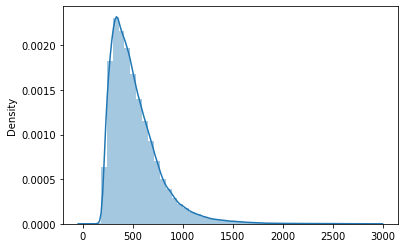

Fold 2 end
Fold 3 start
y dist plot


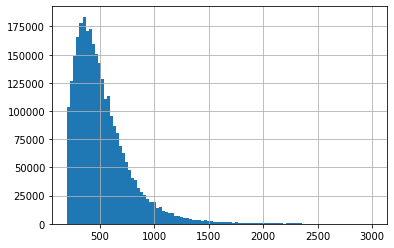

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.003415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7782
[LightGBM] [Info] Number of data points in the train set: 2926581, number of used features: 366


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 524.732369
Training until validation scores don't improve for 500 rounds
[50]	valid_0's huber: 79.597
[100]	valid_0's huber: 64.9581
[150]	valid_0's huber: 58.8217
[200]	valid_0's huber: 55.2403
[250]	valid_0's huber: 52.706
[300]	valid_0's huber: 51.0242
[350]	valid_0's huber: 49.6749
[400]	valid_0's huber: 48.4149
[450]	valid_0's huber: 47.3383
[500]	valid_0's huber: 46.4991
[550]	valid_0's huber: 45.829
[600]	valid_0's huber: 45.239
[650]	valid_0's huber: 44.6588
[700]	valid_0's huber: 44.1396
[750]	valid_0's huber: 43.6654
[800]	valid_0's huber: 43.2545
[850]	valid_0's huber: 42.86
[900]	valid_0's huber: 42.5419
[950]	valid_0's huber: 42.2167
[1000]	valid_0's huber: 41.9381
[1050]	valid_0's huber: 41.6785
[1100]	valid_0's huber: 41.4406
[1150]	valid_0's huber: 41.1942
[1200]	valid_0's huber: 40.9753
[1250]	valid_0's huber: 40.7303
[1300]	valid_0's huber: 40.5246
[1350]	valid_0's huber: 40.3145
[1400]	valid_0's huber: 40.102
[1450]	valid_0

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


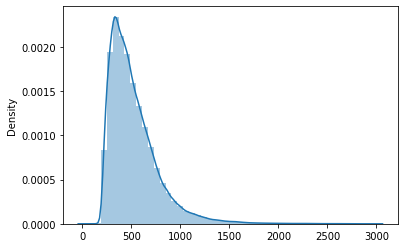

Fold 3 end
Fold 4 start
y dist plot


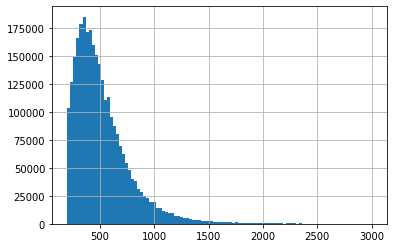

Using categorical_feature in Dataset.


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.919381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7775
[LightGBM] [Info] Number of data points in the train set: 2926581, number of used features: 366


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[LightGBM] [Info] Start training from score 524.646665
Training until validation scores don't improve for 500 rounds
[50]	valid_0's huber: 79.5147
[100]	valid_0's huber: 64.8047
[150]	valid_0's huber: 58.577
[200]	valid_0's huber: 55.0161
[250]	valid_0's huber: 52.6569
[300]	valid_0's huber: 50.7929
[350]	valid_0's huber: 49.4955
[400]	valid_0's huber: 48.3778
[450]	valid_0's huber: 47.4368
[500]	valid_0's huber: 46.5556
[550]	valid_0's huber: 45.8172
[600]	valid_0's huber: 45.2061
[650]	valid_0's huber: 44.6499
[700]	valid_0's huber: 44.1201
[750]	valid_0's huber: 43.6663
[800]	valid_0's huber: 43.2679
[850]	valid_0's huber: 42.8861
[900]	valid_0's huber: 42.5381
[950]	valid_0's huber: 42.2011
[1000]	valid_0's huber: 41.9114
[1050]	valid_0's huber: 41.6241
[1100]	valid_0's huber: 41.3025
[1150]	valid_0's huber: 41.0362
[1200]	valid_0's huber: 40.7576
[1250]	valid_0's huber: 40.5482
[1300]	valid_0's huber: 40.3487
[1350]	valid_0's huber: 40.1451
[1400]	valid_0's huber: 39.9448
[1450]	v

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


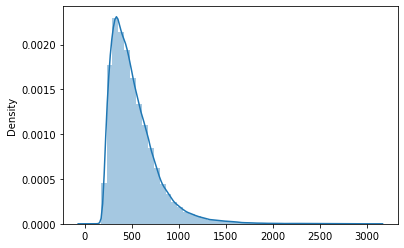

Fold 4 end


<Figure size 432x288 with 0 Axes>

In [22]:
count = 0
oof = np.zeros(training_data_df.shape[0])

shap_summary_df = pd.DataFrame()

for train_idx, val_idx in kf.split(training_data_df):
    print('Fold {} start'.format(count))
    train_data = training_data_df.loc[train_idx]
    val_data = training_data_df.loc[val_idx]
    
    x_train = train_data.drop(columns=cols_to_drop)
    y_train = train_data['가격면적']
    
    x_val = val_data.drop(columns=cols_to_drop)
    y_val = val_data['가격면적']
    
    print('y dist plot')
    y_train.hist(bins=100)
    plt.show()
    plt.clf()
    
    params = {
        'objective': 'huber',
        'learning_rate': 10,
        'seed': 42,
        'max_depth': 12,
        'num_leaves': 37,
        'lambda_l2': 0,
        'metric': 'huber',
        'num_threads': 6,
    }
    
    train_dataset = lgb.Dataset(x_train, label=y_train, categorical_feature=cat_cols)
    val_dataset = lgb.Dataset(x_val, label=y_val, categorical_feature=cat_cols)
    
    num_rounds = 10000

    bst = lgb.train(params, train_dataset, num_rounds, valid_sets=[val_dataset], early_stopping_rounds=500, verbose_eval=50)
    
    bst.save_model(basedir + 'lightgbm_huber_vif5_{}.txt'.format(count), num_iteration=bst.best_iteration)
    
    preds = bst.predict(x_val, num_iteration=bst.best_iteration)
    
    print('preds dist plot')
    sns.distplot(preds)
    plt.show()
    plt.clf()
    
    oof[val_idx] = preds
    
    # shap
    explainer = shap.explainers.Tree(bst)
    
    sample_x = x_val.sample(n=1000)
    sample_y = y_val.loc[x_val.index]
    
    shap_values = explainer.shap_values(sample_x, y=sample_y, check_additivity=True, approximate=False)
    shap_values_T = shap_values.T
    
    shap_summary = np.zeros(x_val.shape[1])
    
    for i in range(x_val.shape[1]):
        shap_summary[i] = np.mean(np.abs(shap_values_T[i]))
    
    
    shap_summary_df['model_{}_shap_summary'.format(count)] = shap_summary
        
    
    print('Fold {} end'.format(count))
    count += 1

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
np.sqrt(mean_squared_error(training_data_df['가격면적'], oof))

66.5816914692676

In [25]:
shap_summary_mean = np.zeros(shap_summary_df.shape[0])
for i in range(shap_summary_df.shape[1]):
    shap_summary_mean += shap_summary_df.iloc[:,i]

In [26]:
shap_summary_mean = shap_summary_mean / shap_summary_df.shape[1]

In [27]:
shap_summary_df['shap_summary_mean'] = shap_summary_mean

In [28]:
shap_summary_df.index = x_train.columns

In [29]:
shap_summary_df.to_csv(basedir + 'shap_summary_vif5.csv')